<a href="https://colab.research.google.com/github/mohangiri1/Physics/blob/main/ExperimentalPhysics/temperature_dependent_bandgap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

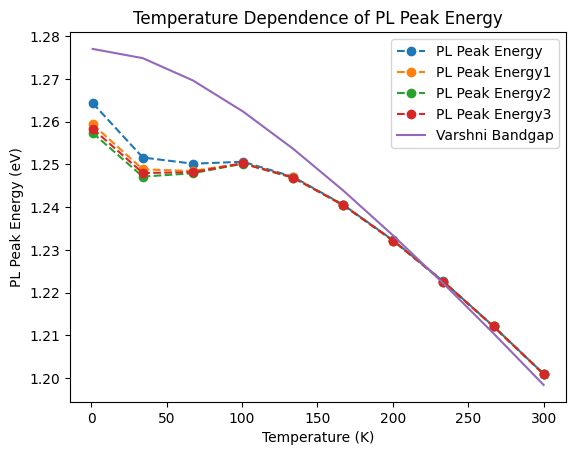

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k as k_B
from scipy.constants import e
from scipy.optimize import fsolve

def solve_for_c(T, sigma, Ea, E0, tau_r, tau_tr):
    """
    Solve for c in the transcendental equation:
    c * exp(c) = [(sigma / (k_B * T))**2 - c] * (tau_r / tau_tr) * exp((E0 - Ea) / (k_B * T))
    with 0 < c < (sigma / (k_B * T))**2.

    Parameters:
    - T (float): Temperature in Kelvin.
    - sigma (float): Standard deviation related to localized states.
    - Ea (float): Activation energy for delocalization.
    - E0 (float): Energy at 0 K.
    - tau_r, tau_tr (float): Recombination and transfer times.

    Returns:
    - c (float): Solution for c(T).
    """
    max_c = (sigma / (k_B * T/e))**2  # Upper limit for c

    # Define the equation for c
    def equation(c):
        if c <= 0 or c >= max_c:
            return np.inf  # Return a large penalty for invalid values of c
        lhs = c * np.exp(c)
        # Limit the value of the exponential term to avoid overflow
        exp_term = np.exp(min((E0 - Ea) / (k_B * T/e), 700))  # limit exponent to prevent overflow
        rhs = (max_c - c) * (tau_r / tau_tr) * exp_term
        return lhs - rhs

    # Initial guess for c within the allowed range
    c_initial_guess = min(1.0, max_c * 0.5)
    # Use fsolve with warning suppression
    c_solution = fsolve(equation, c_initial_guess, xtol=1e-6, full_output=True)

    # Check if solution converged; if not, use a fallback value for c
    if c_solution[2] != 1:
        print(f"Warning: No convergence at T={T}. Using fallback value for c.")
        return max_c * 0.5  # Fallback value within valid range
    return c_solution[0][0]

def pl_peak_energy(T, E0, a, b, sigma, Ea, tau_r, tau_tr):
    """
    Calculate the temperature-dependent PL peak energy based on the given parameters.

    Parameters:
    - T (float or array): Temperature in Kelvin.
    - E0 (float): Energy at 0 K.
    - a, b (float): Varshni equation parameters.
    - sigma (float): Standard deviation related to localized states.
    - Ea (float): Activation energy for delocalization.
    - tau_r, tau_tr (float): Recombination and transfer times.

    Returns:
    - E_T (float or array): Temperature-dependent PL peak energy.
    """
    # Varshni term for bandgap reduction
    varshni_term = a * T**2 / (b + T)

    # Calculate c(T) numerically for each T
    c_T = np.array([solve_for_c(temp, sigma, Ea, E0, tau_r, tau_tr) for temp in T])

    # Total energy according to Eq (5)
    E_T = E0 - varshni_term - c_T * k_B * T/e
    return E_T

def pl_peak_energy_varshni(T, E0, a, b):
    """
    Calculate the temperature-dependent PL peak energy based on the given parameters.

    Parameters:
    - T (float or array): Temperature in Kelvin.
    - E0 (float): Energy at 0 K.
    - a, b (float): Varshni equation parameters.

    Returns:
    - E_T (float or array): Temperature-dependent PL peak energy.
    """
    # Varshni term for bandgap reduction
    varshni_term = a * T**2 / (b + T)

    # Total energy according to Eq (5)
    E_T = E0 - varshni_term
    return E_T

# Example parameters based on provided data
E0 = 1.287  # Peak energy at 0 K in eV for GaAsBi
a = 0.44e-3  # Varshni parameter in eV/K
b = 204      # Varshni parameter in K
sigma = 0.014  # Standard deviation in eV
Ea = 1.265   # Activation energy in eV
tau_r = 25   # Recombination time (arbitrary unit)
tau_tr = 1   # Transfer time (arbitrary unit)

# Temperature range, avoiding very low values to prevent overflow
T_range = np.linspace(1, 300, 10)

# Calculate PL peak energy across the temperature range
E_T_values = pl_peak_energy(T_range, E0, a, b, sigma, Ea, tau_r, tau_tr)
E_T_values1 = pl_peak_energy(T_range, E0, a, b, sigma, 1.26, tau_r, tau_tr)
E_T_values2 = pl_peak_energy(T_range, E0, a, b, sigma, 1.258, tau_r, tau_tr)
E_T_values3 = pl_peak_energy(T_range, E0, a, b, sigma, 1.259, tau_r, tau_tr)
varshni_bandgap = pl_peak_energy_varshni(T_range, 1.277, 0.44e-3, 204)
# Plot the results
plt.plot(T_range, E_T_values,'o--', label='PL Peak Energy')
plt.plot(T_range, E_T_values1,'o--', label='PL Peak Energy1')
plt.plot(T_range, E_T_values2,'o--', label='PL Peak Energy2')
plt.plot(T_range, E_T_values3,'o--', label='PL Peak Energy3')
plt.plot(T_range, varshni_bandgap, label='Varshni Bandgap')
plt.xlabel("Temperature (K)")
plt.ylabel("PL Peak Energy (eV)")
plt.title("Temperature Dependence of PL Peak Energy")
plt.legend()
#plt.ylim(0, 1.3)
plt.show()

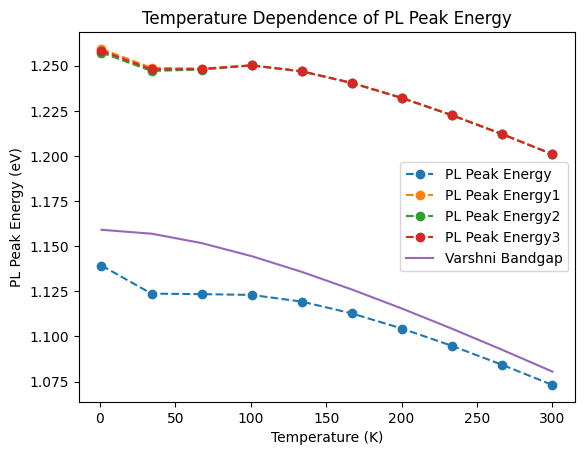

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k as k_B
from scipy.constants import e
from scipy.optimize import fsolve

def solve_for_c(T, sigma, Ea, E0, tau_r, tau_tr):
    """
    Solve for c in the transcendental equation:
    c * exp(c) = [(sigma / (k_B * T))**2 - c] * (tau_r / tau_tr) * exp((E0 - Ea) / (k_B * T))
    with 0 < c < (sigma / (k_B * T))**2.

    Parameters:
    - T (float): Temperature in Kelvin.
    - sigma (float): Standard deviation related to localized states.
    - Ea (float): Activation energy for delocalization.
    - E0 (float): Energy at 0 K.
    - tau_r, tau_tr (float): Recombination and transfer times.

    Returns:
    - c (float): Solution for c(T).
    """
    max_c = (sigma / (k_B * T/e))**2  # Upper limit for c

    # Define the equation for c
    def equation(c):
        if c <= 0 or c >= max_c:
            return np.inf  # Return a large penalty for invalid values of c
        lhs = c * np.exp(c)
        # Limit the value of the exponential term to avoid overflow
        exp_term = np.exp(min((E0 - Ea) / (k_B * T/e), 700))  # limit exponent to prevent overflow
        rhs = (max_c - c) * (tau_r / tau_tr) * exp_term
        return lhs - rhs

    # Initial guess for c within the allowed range
    c_initial_guess = min(1.0, max_c * 0.5)
    # Use fsolve with warning suppression
    c_solution = fsolve(equation, c_initial_guess, xtol=1e-6, full_output=True)

    # Check if solution converged; if not, use a fallback value for c
    if c_solution[2] != 1:
        print(f"Warning: No convergence at T={T}. Using fallback value for c.")
        return max_c * 0.5  # Fallback value within valid range
    return c_solution[0][0]

def pl_peak_energy(T, E0, a, b, sigma, Ea, tau_r, tau_tr):
    """
    Calculate the temperature-dependent PL peak energy based on the given parameters.

    Parameters:
    - T (float or array): Temperature in Kelvin.
    - E0 (float): Energy at 0 K.
    - a, b (float): Varshni equation parameters.
    - sigma (float): Standard deviation related to localized states.
    - Ea (float): Activation energy for delocalization.
    - tau_r, tau_tr (float): Recombination and transfer times.

    Returns:
    - E_T (float or array): Temperature-dependent PL peak energy.
    """
    # Varshni term for bandgap reduction
    varshni_term = a * T**2 / (b + T)

    # Calculate c(T) numerically for each T
    c_T = np.array([solve_for_c(temp, sigma, Ea, E0, tau_r, tau_tr) for temp in T])

    # Total energy according to Eq (5)
    E_T = E0 - varshni_term - c_T * k_B * T/e
    return E_T

def pl_peak_energy_varshni(T, E0, a, b):
    """
    Calculate the temperature-dependent PL peak energy based on the given parameters.

    Parameters:
    - T (float or array): Temperature in Kelvin.
    - E0 (float): Energy at 0 K.
    - a, b (float): Varshni equation parameters.

    Returns:
    - E_T (float or array): Temperature-dependent PL peak energy.
    """
    # Varshni term for bandgap reduction
    varshni_term = a * T**2 / (b + T)

    # Total energy according to Eq (5)
    E_T = E0 - varshni_term
    return E_T

# Example parameters based on provided data
E0 = 1.15913  # Peak energy at 0 K in eV for GaAsBi
a = 0.44e-3  # Varshni parameter in eV/K
b = 204      # Varshni parameter in K
sigma = 0.014  # Standard deviation in eV
Ea = 1.14   # Activation energy in eV
tau_r = 25   # Recombination time (arbitrary unit)
tau_tr = 1   # Transfer time (arbitrary unit)

# Temperature range, avoiding very low values to prevent overflow
T_range = np.linspace(1, 300, 10)

# Calculate PL peak energy across the temperature range
E_T_values = pl_peak_energy(T_range, E0, a, b, sigma, Ea, tau_r, tau_tr)
# E_T_values1 = pl_peak_energy(T_range, E0, a, b, sigma, 1.26, tau_r, tau_tr)
# E_T_values2 = pl_peak_energy(T_range, E0, a, b, sigma, 1.258, tau_r, tau_tr)
# E_T_values3 = pl_peak_energy(T_range, E0, a, b, sigma, 1.259, tau_r, tau_tr)
varshni_bandgap = pl_peak_energy_varshni(T_range, E0, 0.44e-3, 204)
# Plot the results
plt.plot(T_range, E_T_values,'o--', label='PL Peak Energy')
plt.plot(T_range, E_T_values1,'o--', label='PL Peak Energy1')
plt.plot(T_range, E_T_values2,'o--', label='PL Peak Energy2')
plt.plot(T_range, E_T_values3,'o--', label='PL Peak Energy3')
plt.plot(T_range, varshni_bandgap, label='Varshni Bandgap')
plt.xlabel("Temperature (K)")
plt.ylabel("PL Peak Energy (eV)")
plt.title("Temperature Dependence of PL Peak Energy")
plt.legend()
#plt.ylim(0, 1.3)
plt.show()

<ipython-input-1-15cf4b42aa02>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


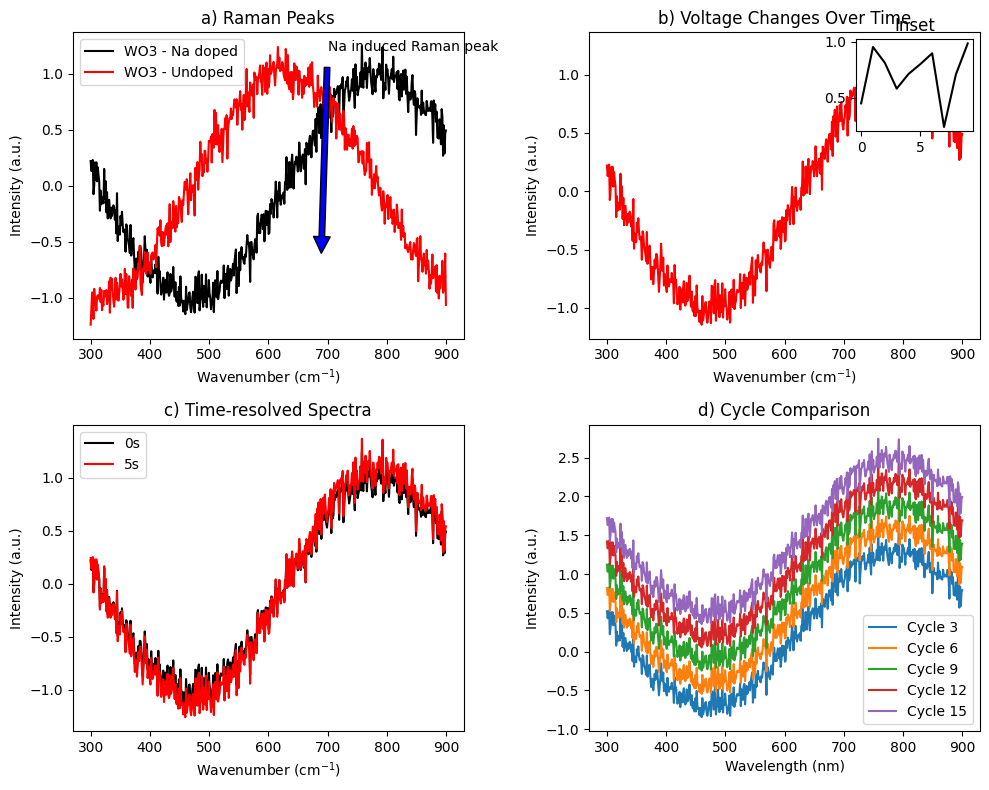

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Sample data for illustration (replace with actual data)
x = np.linspace(300, 900, 500)
y1 = np.sin(x/100) + np.random.normal(0, 0.1, x.size)
y2 = np.cos(x/100) + np.random.normal(0, 0.1, x.size)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Panel (a)
axs[0, 0].plot(x, y1, label='WO3 - Na doped', color='black')
axs[0, 0].plot(x, y2, label='WO3 - Undoped', color='red')
axs[0, 0].set_title('a) Raman Peaks')
axs[0, 0].set_xlabel('Wavenumber (cm$^{-1}$)')
axs[0, 0].set_ylabel('Intensity (a.u.)')
axs[0, 0].legend()
# Add annotations for peaks
axs[0, 0].annotate('Na induced Raman peak', xy=(689, y1[200]), xytext=(700, 1.2),
                   arrowprops=dict(facecolor='blue', shrink=0.05))

# Panel (b) - With inset
axs[0, 1].plot(x, y1, color='red')
axs[0, 1].set_title('b) Voltage Changes Over Time')
axs[0, 1].set_xlabel('Wavenumber (cm$^{-1}$)')
axs[0, 1].set_ylabel('Intensity (a.u.)')
# Add inset
inset_ax = inset_axes(axs[0, 1], width="30%", height="30%", loc='upper right')
inset_ax.plot(np.arange(10), np.random.random(10), color='black')
inset_ax.set_title('Inset')

# Panel (c)
axs[1, 0].plot(x, y1, label='0s', color='black')
axs[1, 0].plot(x, y1 * 1.1, label='5s', color='red')
axs[1, 0].set_title('c) Time-resolved Spectra')
axs[1, 0].set_xlabel('Wavenumber (cm$^{-1}$)')
axs[1, 0].set_ylabel('Intensity (a.u.)')
axs[1, 0].legend()

# Panel (d)
for cycle in range(3, 16, 3):
    axs[1, 1].plot(x, y1 + cycle/10, label=f'Cycle {cycle}')
axs[1, 1].set_title('d) Cycle Comparison')
axs[1, 1].set_xlabel('Wavelength (nm)')
axs[1, 1].set_ylabel('Intensity (a.u.)')
axs[1, 1].legend()

# Layout adjustment
plt.tight_layout()
plt.show()

<ipython-input-2-220ec69591d6>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.1, 0, 1, 1])  # Adjust to make space for the left labels


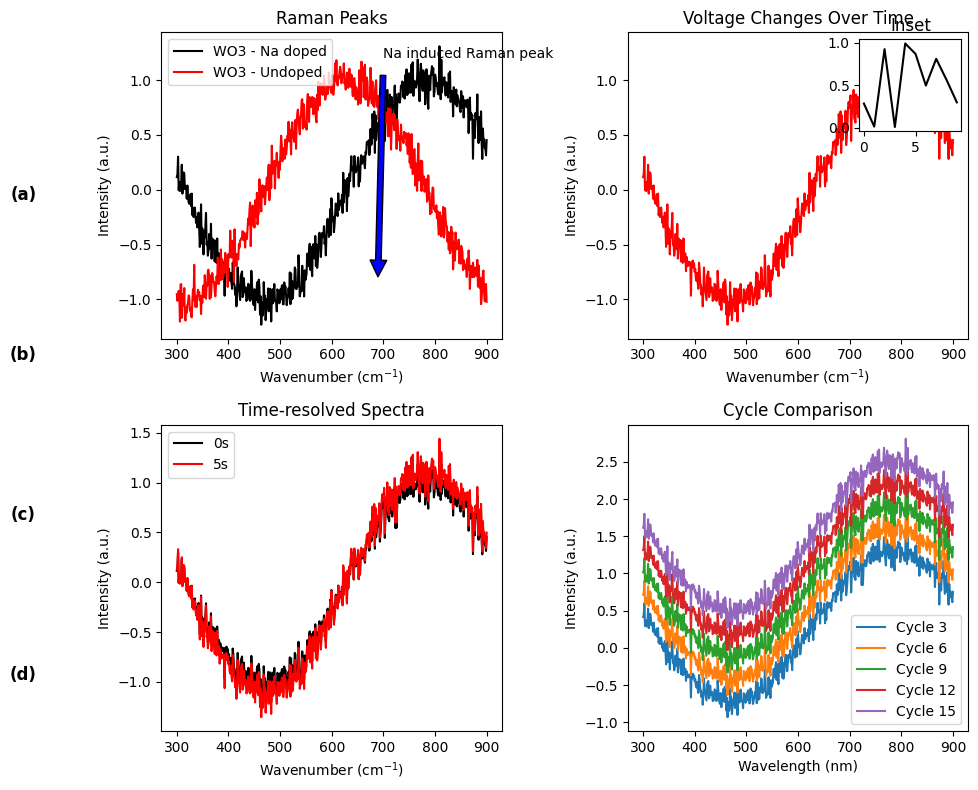

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Sample data for illustration (replace with actual data)
x = np.linspace(300, 900, 500)
y1 = np.sin(x/100) + np.random.normal(0, 0.1, x.size)
y2 = np.cos(x/100) + np.random.normal(0, 0.1, x.size)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Panel (a)
axs[0, 0].plot(x, y1, label='WO3 - Na doped', color='black')
axs[0, 0].plot(x, y2, label='WO3 - Undoped', color='red')
axs[0, 0].set_title('Raman Peaks')
axs[0, 0].set_xlabel('Wavenumber (cm$^{-1}$)')
axs[0, 0].set_ylabel('Intensity (a.u.)')
axs[0, 0].legend()
# Add annotations for peaks
axs[0, 0].annotate('Na induced Raman peak', xy=(689, y1[200]), xytext=(700, 1.2),
                   arrowprops=dict(facecolor='blue', shrink=0.05))

# Panel (b) - With inset
axs[0, 1].plot(x, y1, color='red')
axs[0, 1].set_title('Voltage Changes Over Time')
axs[0, 1].set_xlabel('Wavenumber (cm$^{-1}$)')
axs[0, 1].set_ylabel('Intensity (a.u.)')
# Add inset
inset_ax = inset_axes(axs[0, 1], width="30%", height="30%", loc='upper right')
inset_ax.plot(np.arange(10), np.random.random(10), color='black')
inset_ax.set_title('Inset')

# Panel (c)
axs[1, 0].plot(x, y1, label='0s', color='black')
axs[1, 0].plot(x, y1 * 1.1, label='5s', color='red')
axs[1, 0].set_title('Time-resolved Spectra')
axs[1, 0].set_xlabel('Wavenumber (cm$^{-1}$)')
axs[1, 0].set_ylabel('Intensity (a.u.)')
axs[1, 0].legend()

# Panel (d)
for cycle in range(3, 16, 3):
    axs[1, 1].plot(x, y1 + cycle/10, label=f'Cycle {cycle}')
axs[1, 1].set_title('Cycle Comparison')
axs[1, 1].set_xlabel('Wavelength (nm)')
axs[1, 1].set_ylabel('Intensity (a.u.)')
axs[1, 1].legend()

# Adding subplot labels (a), (b), (c), (d) on the left side
fig.text(0.04, 0.75, '(a)', ha='center', va='center', fontsize=12, fontweight='bold')
fig.text(0.04, 0.55, '(b)', ha='center', va='center', fontsize=12, fontweight='bold')
fig.text(0.04, 0.35, '(c)', ha='center', va='center', fontsize=12, fontweight='bold')
fig.text(0.04, 0.15, '(d)', ha='center', va='center', fontsize=12, fontweight='bold')

# Layout adjustment
plt.tight_layout(rect=[0.1, 0, 1, 1])  # Adjust to make space for the left labels
plt.show()

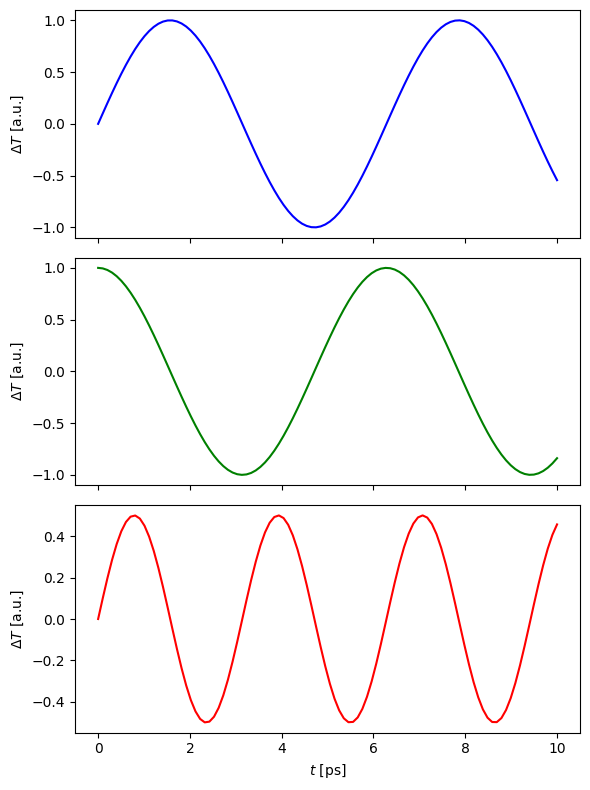

In [7]:
import matplotlib.pyplot as plt

def PumpProbe_3_panel_plot_temperature(t, data1, data2, data3):
    """
    Creates a figure with 3 vertically-stacked subplots (3,1 layout).

    Parameters:
        data1, data2, data3 (array-like): Data to be plotted in each subplot.
        t (array-like): Pump Probe Delay Time [ps]).
    """
    fig, axs = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

    # Plot data on each subplot
    axs[0].plot(t, data1, color='b')
    axs[1].plot(t, data2, color='g')
    axs[2].plot(t, data3, color='r')

    # Set y-axis label for each subplot
    for ax in axs:
        ax.set_ylabel(r'$\Delta T$ [a.u.]')

    # Set x-axis label only for the bottom subplot
    axs[2].set_xlabel(r'$t$ [ps]')

    # Adjust layout
    plt.tight_layout()  # Leave space for the title
    plt.show()

# Example usage (with random data)
import numpy as np
t = np.linspace(0, 10, 100)
data1 = np.sin(t)
data2 = np.cos(t)
data3 = np.sin(t) * np.cos(t)
PumpProbe_3_panel_plot_temperature(t, data1, data2, data3)